Comunidades de grafos - Python

In [1]:
from igraph import Graph
from igraph import plot
import igraph
import numpy as np

In [2]:
# Criação de grafo direcionado com pesos nas arestas
grafo2 = Graph(edges = [(0,2),(0,1),(1,4),(1,5),(2,3),(6,7),(3,7),(4,7),(5,6)], directed = True)
grafo2.vs['label'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
grafo2.es['weight'] = [2,1,2,1,2,1,3,1]

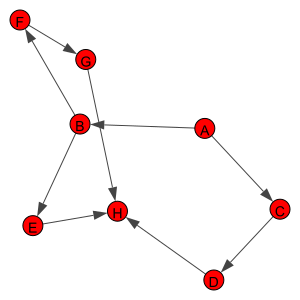

In [3]:
#Visualização do grafo
plot(grafo2, bbox=(0,0,300, 300))

In [4]:
#Visualização de comunidades e em qual comunidade cada registro foi associado
comunidades2 = grafo2.clusters()
print(comunidades2)
comunidades2.membership

Clustering with 8 elements and 8 clusters
[0] 0
[1] 2
[2] 3
[3] 1
[4] 5
[5] 6
[6] 4
[7] 7


C:\Users\ouropreto\AppData\Local\Temp\ipykernel_6488\4091552568.py:2: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  comunidades2 = grafo2.clusters()


[0, 3, 1, 2, 6, 4, 5, 7]

In [5]:
#Função mais otimizada para visualização das comunidades
c = grafo2.community_edge_betweenness()
print(c)
#obtenção do número de clusters
c.optimal_count
#Visualização da nova comunidade
comunidades3 = c.as_clustering()
print(comunidades3)
comunidades3.membership

Dendrogram, 8 elements, 7 merges

7 4 3 6 5 1 2 0
| | | | | | | |
`-' | | | | | |
 |  | | | | | |
 `--' | | | | |
  |   | | | | |
  `---' `-' `-'
    |    |   | 
    `----'   | 
      |      | 
      `------'
Clustering with 8 elements and 3 clusters
[0] 0, 2
[1] 1, 5
[2] 3, 4, 6, 7


[0, 1, 0, 2, 2, 1, 2, 2]

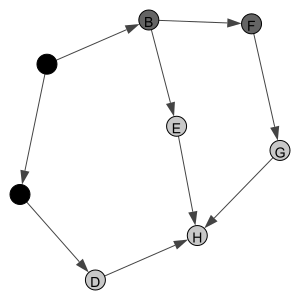

In [7]:
#Geração do grafo das comunidades colocando cores entre os grupos identificados
plot(grafo2, vertex_color = comunidades3.membership)
cores = comunidades3.membership
#Array de cores para definirmos cores diferentes para cada grupo
cores = np.array(cores)
cores = cores * 100
cores = cores.tolist()
plot(grafo2, bbox = (0,0,300,300), vertex_color = cores)

In [9]:
# Visualização dos cliques
cli = grafo2.as_undirected().cliques(min = 4)
print(cli)
len(cli)

[]


0